# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load sample data
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# inspect header
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Is the distribution of body temperatures normal?

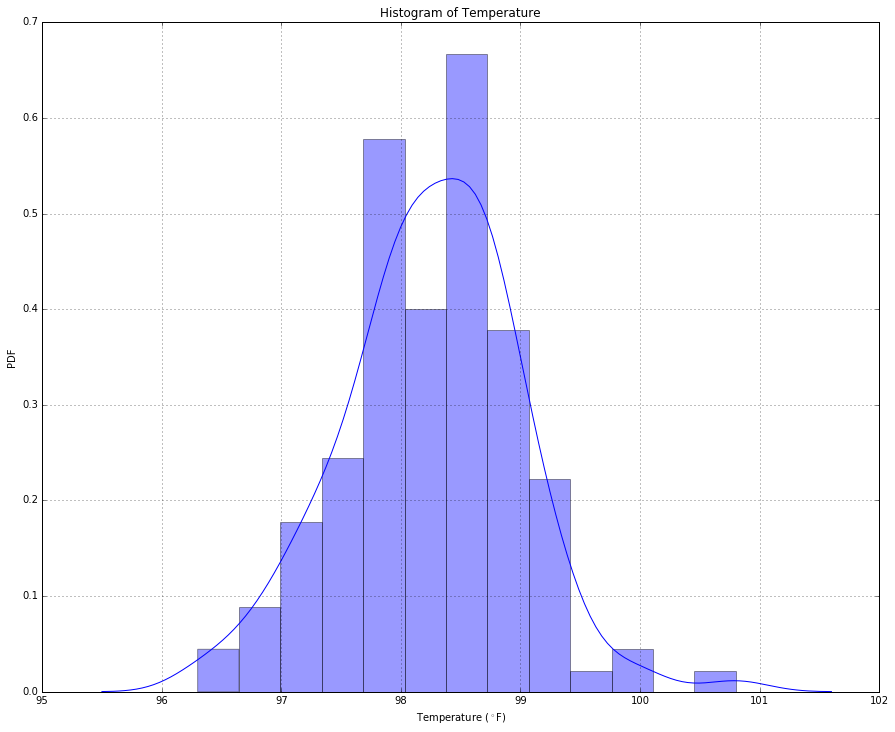

In [4]:
# draw histogram of temperatures

%matplotlib inline
plt.subplots(figsize=(15,12))
sns.distplot(df.temperature)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature ($^\circ$F)')
plt.ylabel('PDF')
plt.grid()
plt.show()

In [5]:
#Define cumulative normal distribution function
def ecdf(data):
    n=len(data)
    x = np.sort(data)
    y = np.arange(1.0000, n+1)/n
    return x,y

In [6]:
# calculate temperature mean of the population sample

temp_mean = np.mean(df.temperature)
print('temperature mean '+ str(temp_mean))

temperature mean 98.2492307692


In [7]:
# calculate temperature Std deviation of the population sample

temp_stdDev = np.std(df.temperature)
print('temperature Standard Deviation '+ str(temp_stdDev))

temperature Standard Deviation 0.730357778905


In [8]:
# generate samples using mean and std deviation of population sample

samples = np.random.normal(temp_mean, temp_stdDev, size=10000)
samples

array([98.6742336 , 96.46671841, 99.42171494, ..., 98.73267613,
       98.09043896, 98.78673995])

In [9]:
# calculate ecdf of population sample

x, y = ecdf(df.temperature)

In [10]:
# calculate ecdf of theoretical sample

x_theor, y_theor = ecdf(samples)

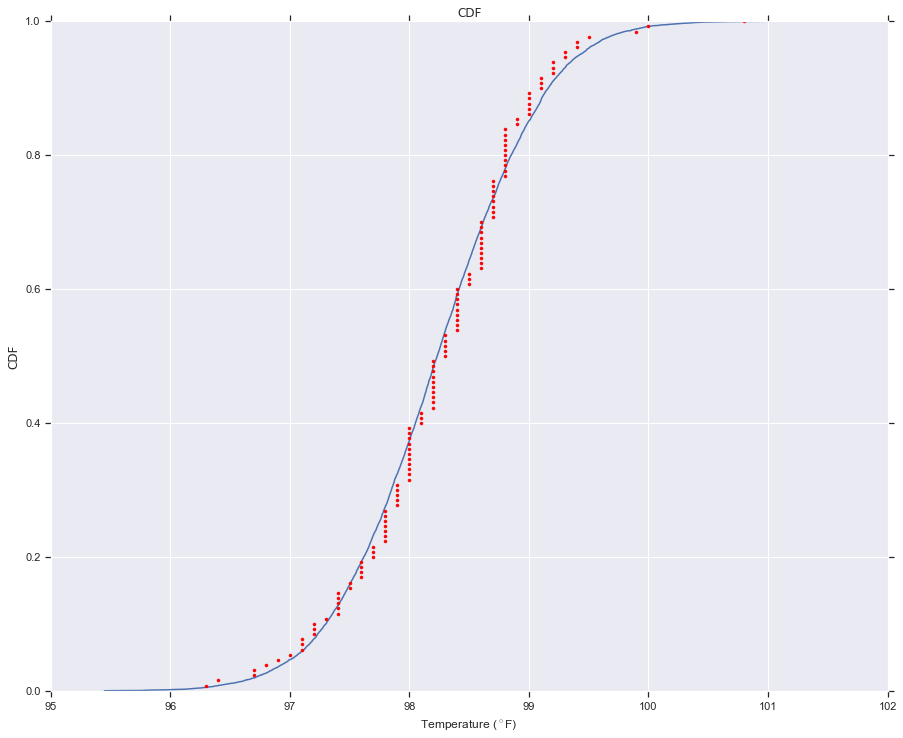

In [12]:
# plot cumulative normal distribution function

%matplotlib inline
plt.subplots(figsize=(15,12))
plt.title('CDF')
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none', color= 'red')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('CDF')
plt.show()

From above graphs it can be inferred that the distribution of temperature is normal.

# Is the sample size large? Are the observations independent?

In [13]:
print(len(df.temperature))

130


Sample size is greater than 30 and hence as per Central Limit Theorem observations are independent.

# Is the true population mean really 98.6 degrees F?

### Bootstrap Method

In [14]:
# Function to generate bootstrap samples
def comp_bssamples(data, func):
    bs = np.random.choice(data, len(data))
    return func(bs)

In [15]:
def comp_bsreplicates(data, func, size):
    bs_rep = np.empty(size)
    for i in range(size):
        bs_rep[i] = comp_bssamples(data, func)
    return bs_rep

In [16]:
# Draw bootstrap replicates of the mean temperature
bs_rep = comp_bsreplicates(df.temperature, np.mean, 10000)
bs_rep

array([98.27076923, 98.33153846, 98.22923077, ..., 98.18307692,
       98.26692308, 98.17307692])

In [17]:
# Compute 95% confidence interval
conf_interval = np.percentile(bs_rep, [2.5, 97.5])
conf_interval

array([98.12230769, 98.37307692])

True population mean does not lie within 95% confidence interval. Hence null hypothesis can be rejected.

### Frequentist Statistical Method

#### Z statistic

In this test we will be using one sample testing since there is one data set which is compared to a single value.
Z statistic is used, because sample size is greater than 30 and is normally distributed. 

In [18]:
#Define z test function

def zTest(data):
    """ (sample mean - population mean) divide by (estimate of population std dev/sqrt(sample size))"""
    #compute sample mean
    smp_mean = np.mean(data)
    
    #Estimate std dev of population mean
    est_pop_Stddev = np.std(data)/np.sqrt(len(data))
    
    zscore = (smp_mean-98.6)/est_pop_Stddev
    pvalue = stats.norm.cdf(zscore)*2
    conf_interval = stats.norm.interval(alpha=0.05,loc=smp_mean,scale=est_pop_Stddev)
    print('Z score: ', zscore)
    print('p value: ', pvalue)
    print('Confidence Interval: ', conf_interval)

In [19]:
# Calulate T test hypothesis

zTest(df.temperature)

('Z score: ', -5.475925202078116)
('p value: ', 4.3523151658821886e-08)
('Confidence Interval: ', (98.24521398531729, 98.25324755314426))


#### T statistic

In [20]:
#Define z test function

def tTest(data):
    """ (sample mean - population mean) divide by (estimate of population std dev/sqrt(sample size))"""
    #compute sample mean
    smp_mean = np.mean(data)
    
    #Estimate std dev of population mean
    est_pop_Stddev = np.std(data)/np.sqrt(len(data))
    
    tscore,t_pvalue = stats.ttest_1samp(data,98.6)
    dof = len(data) - 1
    conf_interval = stats.t.interval(alpha=0.05, df=dof, loc= smp_mean, scale= est_pop_Stddev)
    
    print('t score: ', tscore)
    print('p value: ', t_pvalue)
    print('confidence interval: ', conf_interval)

In [21]:
# Calulate T test hypothesis

tTest(df.temperature)

('t score: ', -5.4548232923645195)
('p value: ', 2.4106320415561276e-07)
('confidence interval: ', (98.24520616261418, 98.25325537584737))


Since p is almost zero we can reject the null hypothesis.

# Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [22]:
# generate sample size of 10

np.random.seed(seed=42)
sample_size10 = np.random.choice(df.temperature, size=10)

In [23]:
zTest(sample_size10)

('Z score: ', -3.260780417008125)
('p value: ', 0.001111060453904971)
('Confidence Interval: ', (98.03942316762917, 98.06057683237083))


In [24]:
tTest(sample_size10)

('t score: ', -3.0934479202257976)
('p value: ', 0.012857704604809363)
('confidence interval: ', (98.03912461741646, 98.06087538258353))


T statistic is the correct one to use because sample size is less than 30. Results are same because sample is same for both the methods.

# At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws

In [25]:
#calculate z critical

z_critical = stats.norm.ppf(q = 0.975) 

print("z-critical value:", z_critical)                                     

temp_mean = np.mean(df.temperature)
temp_std = np.std(df.temperature)

# calculate margin of error
margin_of_error = z_critical * (temp_std/np.sqrt(len(df.temperature)))

# calculate confidence interval for margin of error
confidence_interval = (temp_mean - margin_of_error,
                       temp_mean + margin_of_error)  

print("Margin of errror: ", margin_of_error)
print("Confidence interval:", confidence_interval)
print("\n")
print("Temperature outside confidence interval is abnormal, so temperatures outside "+str(confidence_interval)+ " is abnormal")

('z-critical value:', 1.959963984540054)
('Margin of errror: ', 0.12554865777413815)
('Confidence interval:', (98.12368211145665, 98.37477942700491))


Temperature outside confidence interval is abnormal, so temperatures outside (98.12368211145665, 98.37477942700491) is abnormal


# Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [26]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [27]:
# male temperature sample

mSample = df.temperature[df.gender == 'M']

In [28]:
# female temperature sample

fSample = df.temperature[df.gender == 'F']

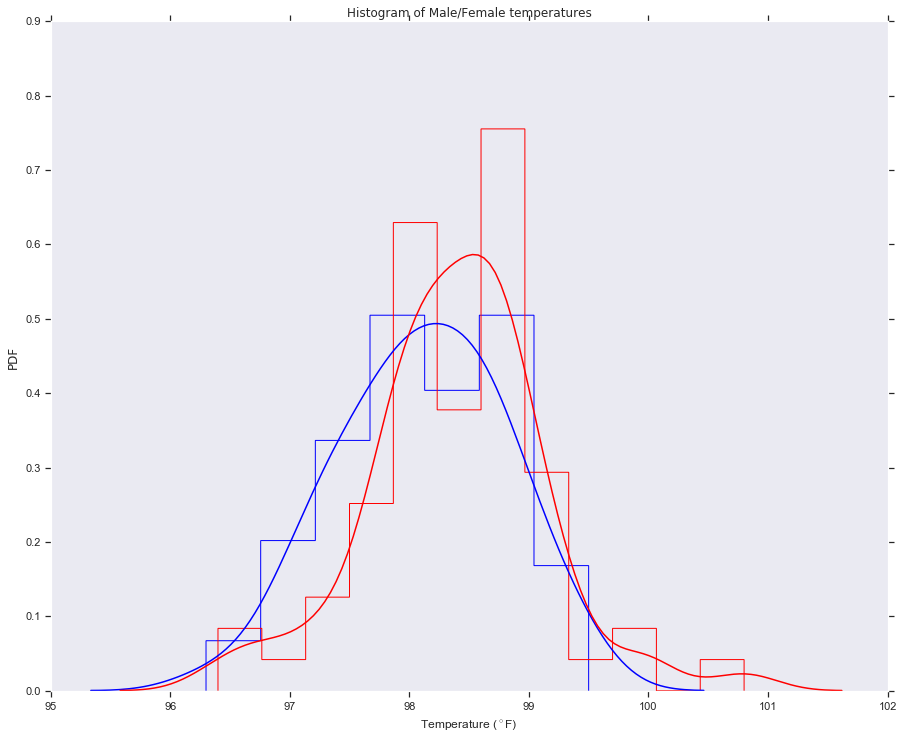

In [29]:
# Histogram of Male and Female temperatures

%matplotlib inline
plt.subplots(figsize=(15,12))
sns.distplot(mSample, color='blue', 
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "blue"})
sns.distplot(fSample, color='red', 
            hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "red"})
plt.yticks(np.arange(0, 1, step=0.1))
plt.title('Histogram of Male/Female temperatures')
plt.xlabel('Temperature ($^\circ$F)')
plt.ylabel('PDF')
plt.grid()
plt.show()

In [30]:
#draw bootstrap replicates for male and female temperatures

bs_rep = comp_bsreplicates(df.temperature, np.mean, 10000)
bs_rep

array([98.28769231, 98.38153846, 98.23307692, ..., 98.24692308,
       98.21538462, 98.29      ])

In [31]:
# Compute 95% confidence interval
conf_interval = np.percentile(bs_rep, [2.5, 97.5])
conf_interval

array([98.12461538, 98.37540385])

In [32]:
#Calculate ecdf of male temperatures

x_m, y_m = ecdf(mSample)

In [33]:
#Calculate ecdf of female temperatures

x_f, y_f = ecdf(fSample)

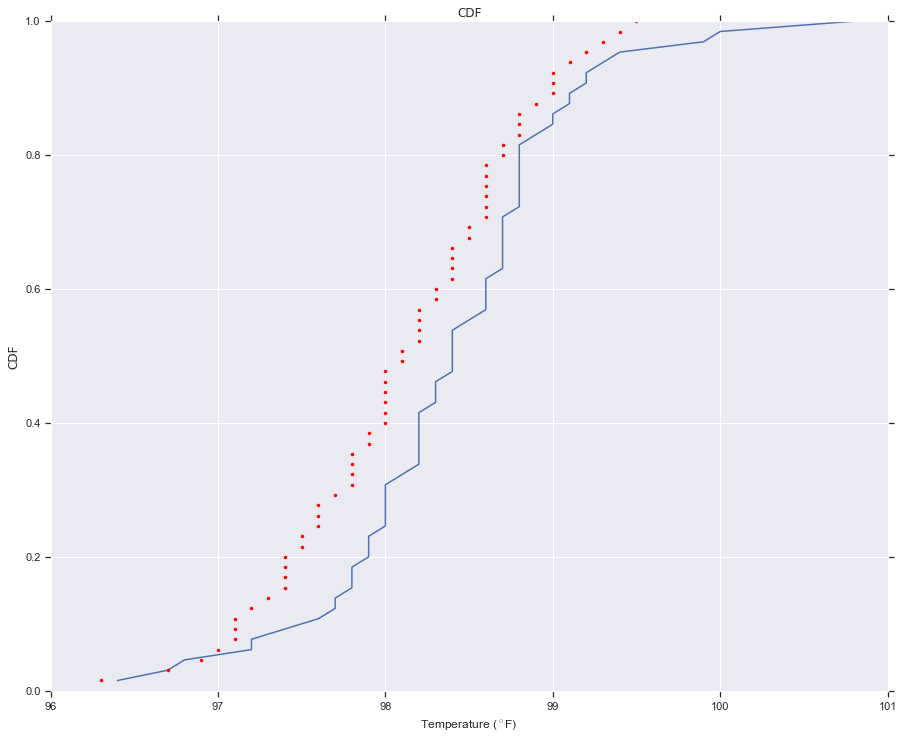

In [35]:
# Draw cumulative distribution of male and female temperatures

%matplotlib inline
plt.subplots(figsize=(15,12))
plt.title('CDF')
sns.set()
_ = plt.plot(x_f, y_f)
_ = plt.plot(x_m, y_m, marker='.', linestyle='none', color ='red')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('CDF')
plt.show()

### Permutation Test

In [36]:
# define function for generating permutation replicates

def draw_perm_reps(data, func, size=1):
    perm_replicates = np.empty(size)
    length = int(len(data)/2)
    for i in range(size):
        permutation_sample_1 = data[0:length]
        permutation_sample_2 = data[length:]
        perm_replicates[i] = func(permutation_sample_1) - func(permutation_sample_2)
    return perm_replicates

In [37]:
# draw permutation replicates
permutation_reps = draw_perm_reps(df.temperature, np.mean, 10000)

# compute confidence interval
mfTemp_confInterval = np.percentile(permutation_reps, [2.5, 97.5])
print('95% confidence interval ', mfTemp_confInterval)

# difference in mean of male and female temperature means
mean_difference = np.mean(fSample) - np.mean(mSample)
print('difference in female and male temperature', mean_difference)

# Calcuate p value
pvalue_mftempDiff = np.sum(permutation_reps >= mean_difference)/len(permutation_reps)
print('P-value', pvalue_mftempDiff)

('95% confidence interval ', array([0.04307692, 0.04307692]))
('difference in female and male temperature', 0.289230769230727)
('P-value', 0)


P-value is zero so we can reject null hypothesis

### Frequentist

In [38]:
# Calculate p value and z score for male and female temperatures

stats.ttest_ind(a=mSample,b=fSample)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

P-value is less than 0.05 so we can reject null hypothesis

# Conclusion

1. Temperature values in sample proportion are normally distributed.
2. Mean human body temperature is not 98.6 which generally considered mean human body temperature.
3. Normal human body temperatures are in the range of (98.12368211145665, 98.37477942700491).
4. Male and female mean body temperatures are not same. Females have slightly higher temperature than males.